# Lecture 6 Pandas Data Preprocessing

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('auto.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'auto.csv'

In [ ]:
df #coloum name wrong because there is no colume in file

In [ ]:
df = pd.read_csv('auto.csv' ,header = None)


In [ ]:
df #now fixed

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
df.columns = headers

In [ ]:
df #Now colums are assigns

In [ ]:
df.head() # by defaut diplay top 5 rows

In [ ]:
df.head(9)  # by diplay top 9 rows

In [ ]:
df.tail() # by defaut diplay bottom 5 rows

In [ ]:
df.tail(10) # by diplay bottom 10 rows

In [ ]:
df['make'].head(19) #only make column will be displayed

In [ ]:
df[['make','body-style','num-of-doors']].head(11)#have to make list

In [ ]:
df

In [ ]:
import numpy as np #convert ? to nan

In [ ]:
df.replace("?",np.nan,inplace = True)

In [ ]:
df

In [ ]:
df.isnull() #where there is missing value it puts false and where is data it put true

In [ ]:
df.isnull().sum()

In [ ]:
df['normalized-losses'].head(25)

In [ ]:
df['normalized-losses'].astype('float').mean()

In [ ]:
# df['normalized-losses'] = df['normalized-losses'].astype('float') is will permanatly change type of float

In [ ]:
m = df['normalized-losses'].astype('float').mean()

In [ ]:
m

In [ ]:
df['normalized-losses'].replace(np.nan,m,inplace =True)

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
df['num-of-doors'].head(25)

In [ ]:
df['num-of-doors'].value_counts()

In [ ]:
df['num-of-doors'].value_counts().max()

In [ ]:
df['num-of-doors'].value_counts().min()

In [ ]:
df['num-of-doors'].value_counts().idxmax()

In [ ]:
mx = df['num-of-doors'].value_counts().idxmax()

In [ ]:
mx

In [ ]:
df['num-of-doors'].replace(np.nan,mx,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df

In [ ]:
df['bore'].astype('float').mean()

In [ ]:
bmean = df['bore'].astype('float').mean()

In [ ]:
bmean

In [ ]:
df['bore'].replace(np.nan,bmean,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
hmean = df['horsepower'].astype('float').mean()
df['horsepower'].replace(np.nan,hmean,inplace=True)
df.isnull().sum()

In [ ]:
smean = df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan,smean,inplace=True)
df.isnull().sum()

In [ ]:
prmean = df['peak-rpm'].astype('float').mean()
df['peak-rpm'].replace(np.nan,prmean,inplace=True)
df.isnull().sum()

In [ ]:
pmean = df['price'].astype('float').mean()
df['price'].replace(np.nan,pmean,inplace=True)
df.isnull().sum()

In [ ]:
df

In [ ]:
df


# Data Visulaization and Binning

In [ ]:
'''
marplotlib
seaborn
ploty
pygal

'''

In [ ]:
import matplotlib as plt
from matplotlib import pyplot


In [ ]:
plt.pyplot.hist(df['num-of-doors'])

In [ ]:

plt.pyplot.hist(df['make'], color = 'yellow',ec='black')

# Binning 

In [ ]:
df['horsepower'].head(25)

In [ ]:
cat = ['Low','Avg','High']

In [ ]:
df['horsepower'] = df['horsepower'].astype('int')

In [ ]:
df['horsepower'].min()

In [ ]:
df['horsepower'].max()

In [ ]:
b = np.linspace(df['horsepower'].min(),df['horsepower'].max(),4)

In [ ]:
b

In [ ]:
pd.cut(df['horsepower'],b,labels = cat,include_lowest = True)

In [ ]:
df['horsepower-bin'] = pd.cut(df['horsepower'],b,labels = cat,include_lowest = True)

In [ ]:
df[['horsepower','horsepower-bin']] .head(20)

In [ ]:
plt.pyplot.title('Programming for Big Data')
plt.pyplot.xlabel('Category')
plt.pyplot.ylabel('Frequency')
plt.pyplot.hist(df['horsepower-bin'], color = 'yellow',ec='black')

# LECTURE 10 DATA VISULIZATION & CORRELATION

In [ ]:
# pie char
plt.pyplot.pie(df['horsepower-bin'].value_counts())

In [ ]:
df['horsepower-bin'].value_counts()

In [ ]:
plt.pyplot.pie(df['horsepower-bin'].value_counts(),explode=[0,0.5,0],shadow=True)

In [ ]:
plt.pyplot.pie(df['horsepower-bin'].value_counts(),explode=[0,0.5,0],shadow=True,colors = ['Yellow','cyan','blue'])

In [ ]:
plt.pyplot.pie(df['horsepower-bin'].value_counts(),explode=[0,0.5,0],shadow=True,colors = ['Yellow','cyan','blue'], labels = ['Low','Avg','High'])

In [ ]:
plt.pyplot.pie(df['horsepower-bin'].value_counts(),explode=[0,0.5,0],shadow=True,colors = ['Yellow','cyan','blue'], labels = ['Low','Avg','High'],autopct = '%1.1f%%')

In [ ]:
plt.pyplot.pie(df['horsepower-bin'].value_counts(),explode=[0,0.5,0],shadow=True,colors = ['Yellow','cyan','blue'], labels = ['Low','Avg','High'],autopct = '%1.1f%%',startangle=90)

# CORELATION

In [ ]:
# 1.Positive Corelation
# 2.Negative Corelation
# 3.Zero Corelation (Neutrol Corelation)

In [ ]:
df.corr()

In [ ]:
import seaborn as sns

In [ ]:
sns.regplot(data = df, x =df['highway-mpg'], y =df['city-mpg'])

In [ ]:
sns.regplot(data = df, x =df['curb-weight'], y =df['highway-mpg'])

In [ ]:
sns.regplot(data = df, x =df['engine-size'], y =df['compression-ratio'])

In [ ]:
# heatmap

B =['symboling','length','highway-mpg','compression-ratio','engine-size'] 

In [ ]:
sns.heatmap(df[B].corr())

In [ ]:
sns.heatmap(df[B].corr(),annot =True)

In [ ]:
sns.heatmap(df[B].corr(),annot =True,cmap='PuBu')

In [ ]:
sns.heatmap(df[B].corr(),annot =True,cmap='PiYG')

# LEC 11 Linear Regression


In [ ]:
#ANIMAL VS HUMAN BLOG 300 TO 400

In [ ]:
#MACHINE LEARNING
#TYPES 
#SUPERVISE LEARNING->LABEL(CAR,MANGO ETC)->KNOW (FEATURES AND LABLES)
#UNSUPERVISE LEARNING->GROUPING (ONLY FEATURES)
#REINFORMENT LEARNING->LEARNING THROUGH ENVIROMENT

In [ ]:
#Y=mx+c Class Label SINGLE x = features, m = coffeciant of x

In [ ]:
#{m1x1+m2x2+m3+x3.....mnxn] +c  multiple 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
df = pd.read_csv("USA_Housing.csv")

In [17]:
df


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [21]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [41]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [42]:
y = df['Price']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [45]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4156,73907.479047,5.478497,7.509485,6.36,37171.011356
3261,74360.180214,5.691122,8.373043,6.22,32337.483884
2005,64494.479764,6.058062,7.528962,3.44,29404.067583
2379,49345.424446,6.276724,8.123990,5.04,15113.587197
1765,58655.854097,5.857894,6.630832,4.02,40740.780151
...,...,...,...,...,...
321,76192.656036,7.303750,7.337590,6.33,21245.841619
4066,52840.211157,6.855066,6.855513,4.06,40736.738074
3980,72899.658203,5.222040,6.861010,4.21,39311.147543
931,73386.407340,4.966360,7.915453,4.30,38413.490484


In [46]:
lm = LinearRegression()

In [48]:
lm.fit(x_train,y_train)

LinearRegression()

In [51]:
lm.coef_

array([2.16061158e+01, 1.65586161e+05, 1.20559762e+05, 1.26190094e+03,
       1.52175095e+01])

In [52]:
lm.intercept_

-2637092.187658512

In [53]:
pred = lm.predict(x_test)

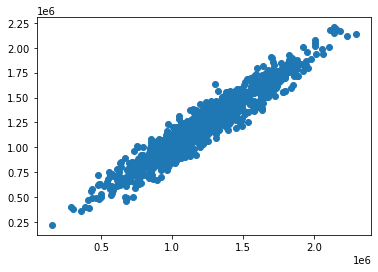

In [58]:
plt.scatter(y_test,pred)